Import necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from get_dataset import X
from get_dataset import y

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

seed = 1234

Setup the training data

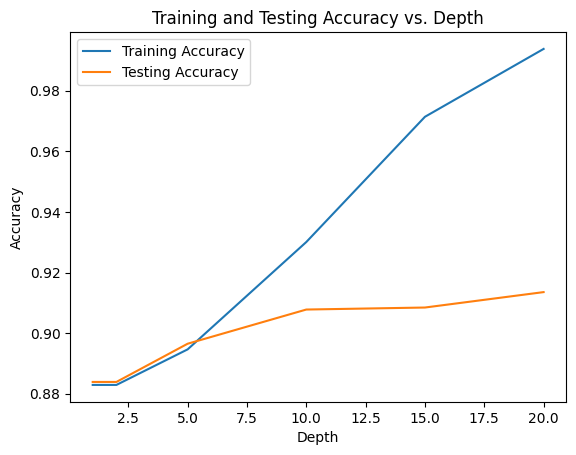

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed, shuffle=True)

decisionTreeDepthData = {
    'Max Depth': [],
    'Training Accuracy': [],
    'Testing Accuracy': []
}
depths = [1, 2, 5, 10, 15, 20]

for depth in depths:
    decisionTreeModel = RandomForestClassifier(max_depth=depth, random_state=seed)
    decisionTreeModel.fit(X_train, y_train)
    decisionTreeDepthData['Training Accuracy'].append(decisionTreeModel.score(X_train, y_train))
    decisionTreeDepthData['Testing Accuracy'].append(decisionTreeModel.score(X_test, y_test))
    decisionTreeDepthData['Max Depth'].append(depth)


plt.plot(depths, decisionTreeDepthData['Training Accuracy'], label="Training Accuracy")
plt.plot(depths, decisionTreeDepthData['Testing Accuracy'], label="Testing Accuracy")
plt.legend()
plt.title('Training and Testing Accuracy vs. Depth')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

In [3]:
decisionTreeDepthData['Testing Accuracy']

[0.8839009287925697,
 0.8839009287925697,
 0.8965059708093763,
 0.9077841662980982,
 0.9084475895621407,
 0.9135338345864662]